In [19]:
#LETS WORK WITH CIFAR 10 DATA 

#ABOUT CIFAR 10 

It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

#How to get Images 

 we have  a package called torchvision, that has data loaders for common datasets such as Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz., torchvision.datasets and torch.utils.data.DataLoader.

 

In [20]:
#STEP 1 : LOAD CIFAR 10 DATA
import os
os.path.abspath(os.getcwd())

'/content'

In [21]:
#SECTION1 REQUIRED LIBRARY 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np

from drive.MyDrive.S8.utils import Dataloader
from drive.MyDrive.S8.utils import show_images
from drive.MyDrive.S8.utils import classcount
from drive.MyDrive.S8.models import BasicModel
from drive.MyDrive.S8.models import RESNET
from drive.MyDrive.S8.utils import plot_misclassified_image
from drive.MyDrive.S8.utils import perClassResult
from drive.MyDrive.S8.utils import train
from drive.MyDrive.S8.utils import test

In [22]:
#DOWNLOAD THE IMAGES 

class Args:

    # Data Loading
    # ============

    # train_batch_size = 64
    # val_batch_size = 64
    num_workers = 4
    batch_size = 128


    # Regularization
    # ==============
    #dropout = 0.1
    dropout = 0

    # Training
    # ========
    random_seed = 1
    epochs = 15
    learning_rate = 0.01
    momentum = 0.9


In [23]:
#get mean and standard deviation of images 
import torchvision
import torchvision.transforms as transforms
import torch
trainset = torchvision.datasets.CIFAR10(root='./data',download=True,transform=transforms.ToTensor())
mean,std = Dataloader.calculate_mean_std(trainset)

# mean =[0.5,0.5,0.5]
# std =[0.5,0.5,0.5]

Files already downloaded and verified


In [24]:
import torchvision
import torchvision.transforms as transforms
import torch
trainloader,testloader=Dataloader.train_test_loader(Args.batch_size,Args.num_workers)
classes = Dataloader.get_classes()

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


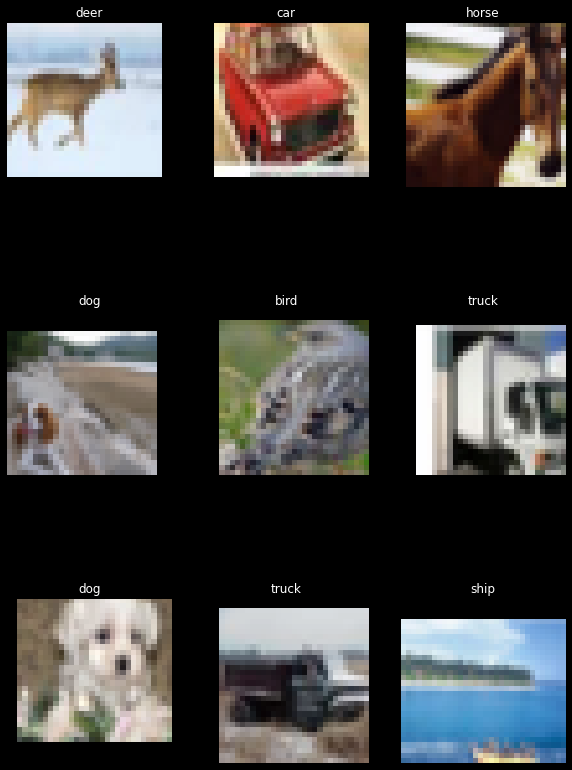

In [25]:
#plot  n raw images 
#make sure n is a squared number 
show_images.plot_n_image(9,trainloader,classes,mean,std,format='raw')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


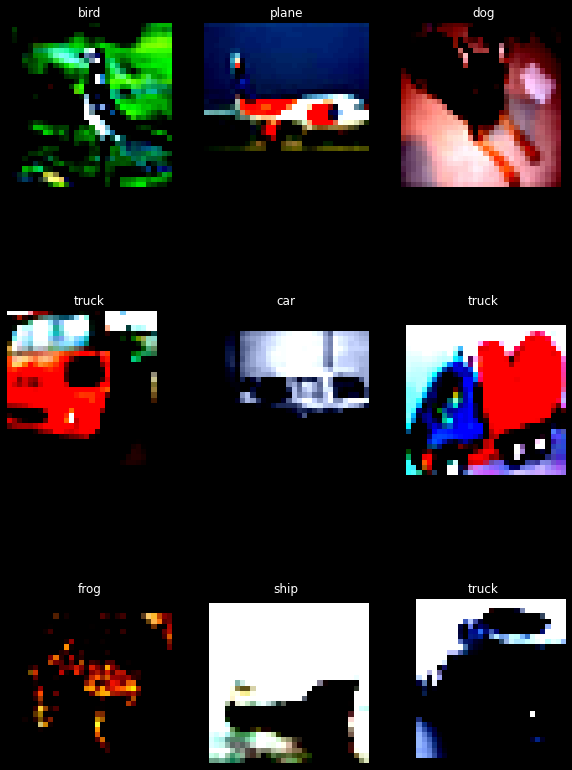

In [26]:
#plot  n normalized images 
#make sure n is a squared number 
show_images.plot_n_image(9,trainloader,classes,mean,std,format='normalized')

In [27]:
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
class_count = classcount.get_train_class_count(dataset,classes)
print(class_count)

Files already downloaded and verified
{'frog': 5000, 'truck': 5000, 'deer': 5000, 'car': 5000, 'bird': 5000, 'horse': 5000, 'ship': 5000, 'cat': 5000, 'dog': 5000, 'plane': 5000}


In [28]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

#working 
#model = BasicModel.Net().to(device)


model = RESNET.ResNet18().to(device) 
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [29]:

import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
#criterion = nn.CrossEntropyLoss()
lossfunc = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9,weight_decay=5e-4)
scheduler = StepLR(optimizer, step_size=12, gamma=0.1)

In [30]:
#Test
EPOCHS = 50

trainer = train.Trainer()
tester  = test.Tester()
lambda_l1=0
for epoch in range(EPOCHS):
  print("EPOCH:", epoch+1, "last LR=",scheduler.get_last_lr(), "CURRENT LR = ", scheduler.get_lr())
  trainer.train(model, device, trainloader, optimizer, lossfunc, epoch, lambda_l1)
  scheduler.step()
  tester.test(model, device, testloader)



test_losses,test_acc=tester.getValuesTest()
train_losses,train_acc=trainer.getValuesTrain()


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:370: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)
  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.8392173647880554 Batch_id=390 Accuracy=47.27: 100%|██████████| 391/391 [01:02<00:00,  6.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.7311, Test Accuracy: 5860/10000 (58.60%)

EPOCH: 2 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.6965826153755188 Batch_id=390 Accuracy=66.47: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.0100, Test Accuracy: 6543/10000 (65.43%)

EPOCH: 3 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.6260011196136475 Batch_id=390 Accuracy=74.64: 100%|██████████| 391/391 [01:04<00:00,  6.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -7.0795, Test Accuracy: 7304/10000 (73.04%)

EPOCH: 4 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.630492091178894 Batch_id=390 Accuracy=79.20: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -7.5533, Test Accuracy: 7797/10000 (77.97%)

EPOCH: 5 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.5338640213012695 Batch_id=390 Accuracy=81.82: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -8.5317, Test Accuracy: 8219/10000 (82.19%)

EPOCH: 6 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.43200159072875977 Batch_id=390 Accuracy=83.98: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -8.9839, Test Accuracy: 7886/10000 (78.86%)

EPOCH: 7 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.6458169221878052 Batch_id=390 Accuracy=85.32: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -8.8068, Test Accuracy: 8029/10000 (80.29%)

EPOCH: 8 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.3340238928794861 Batch_id=390 Accuracy=86.51: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.0471, Test Accuracy: 8364/10000 (83.64%)

EPOCH: 9 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.36509644985198975 Batch_id=390 Accuracy=87.55: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.6489, Test Accuracy: 8443/10000 (84.43%)

EPOCH: 10 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.5997573137283325 Batch_id=390 Accuracy=88.42: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -10.6040, Test Accuracy: 8483/10000 (84.83%)

EPOCH: 11 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.4413851201534271 Batch_id=390 Accuracy=89.35: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.9661, Test Accuracy: 8427/10000 (84.27%)

EPOCH: 12 last LR= [0.01] CURRENT LR =  [0.01]


Train set: Loss=0.3760114908218384 Batch_id=390 Accuracy=89.86: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -10.8239, Test Accuracy: 8689/10000 (86.89%)

EPOCH: 13 last LR= [0.001] CURRENT LR =  [0.0001]


Train set: Loss=0.31938037276268005 Batch_id=390 Accuracy=93.25: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.4026, Test Accuracy: 9048/10000 (90.48%)

EPOCH: 14 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.21180033683776855 Batch_id=390 Accuracy=94.30: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.4906, Test Accuracy: 9098/10000 (90.98%)

EPOCH: 15 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.26795661449432373 Batch_id=390 Accuracy=94.79: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.5982, Test Accuracy: 9105/10000 (91.05%)

EPOCH: 16 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.14324802160263062 Batch_id=390 Accuracy=94.93: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.8207, Test Accuracy: 9116/10000 (91.16%)

EPOCH: 17 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.13235297799110413 Batch_id=390 Accuracy=95.35: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.0409, Test Accuracy: 9124/10000 (91.24%)

EPOCH: 18 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.19812902808189392 Batch_id=390 Accuracy=95.54: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.1001, Test Accuracy: 9138/10000 (91.38%)

EPOCH: 19 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.17597439885139465 Batch_id=390 Accuracy=95.59: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.3398, Test Accuracy: 9137/10000 (91.37%)

EPOCH: 20 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.15053507685661316 Batch_id=390 Accuracy=95.87: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.3518, Test Accuracy: 9137/10000 (91.37%)

EPOCH: 21 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.2678515315055847 Batch_id=390 Accuracy=95.85: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.4209, Test Accuracy: 9116/10000 (91.16%)

EPOCH: 22 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.10598864406347275 Batch_id=390 Accuracy=96.23: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.5455, Test Accuracy: 9120/10000 (91.20%)

EPOCH: 23 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.10720529407262802 Batch_id=390 Accuracy=96.35: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.6659, Test Accuracy: 9149/10000 (91.49%)

EPOCH: 24 last LR= [0.001] CURRENT LR =  [0.001]


Train set: Loss=0.07415692508220673 Batch_id=390 Accuracy=96.52: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.7546, Test Accuracy: 9163/10000 (91.63%)

EPOCH: 25 last LR= [0.0001] CURRENT LR =  [1e-05]


Train set: Loss=0.04543812945485115 Batch_id=390 Accuracy=96.84: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.8804, Test Accuracy: 9166/10000 (91.66%)

EPOCH: 26 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=0.05923778936266899 Batch_id=390 Accuracy=96.85: 100%|██████████| 391/391 [01:05<00:00,  5.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.7965, Test Accuracy: 9156/10000 (91.56%)

EPOCH: 27 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=0.08725962787866592 Batch_id=390 Accuracy=96.94: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.9011, Test Accuracy: 9162/10000 (91.62%)

EPOCH: 28 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=0.0940418392419815 Batch_id=390 Accuracy=97.18: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.9263, Test Accuracy: 9162/10000 (91.62%)

EPOCH: 29 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=0.05339775234460831 Batch_id=390 Accuracy=97.03: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.9362, Test Accuracy: 9173/10000 (91.73%)

EPOCH: 30 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=0.09692831337451935 Batch_id=390 Accuracy=97.08: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.8776, Test Accuracy: 9176/10000 (91.76%)

EPOCH: 31 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=0.06767012923955917 Batch_id=390 Accuracy=97.08: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.9146, Test Accuracy: 9175/10000 (91.75%)

EPOCH: 32 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=0.09268651902675629 Batch_id=390 Accuracy=97.04: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.9683, Test Accuracy: 9168/10000 (91.68%)

EPOCH: 33 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=0.09417545795440674 Batch_id=390 Accuracy=97.16: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.8727, Test Accuracy: 9163/10000 (91.63%)

EPOCH: 34 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=0.10518499463796616 Batch_id=390 Accuracy=97.11: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.8542, Test Accuracy: 9178/10000 (91.78%)

EPOCH: 35 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=0.10446971654891968 Batch_id=390 Accuracy=97.31: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.8887, Test Accuracy: 9178/10000 (91.78%)

EPOCH: 36 last LR= [0.0001] CURRENT LR =  [0.0001]


Train set: Loss=0.11642881482839584 Batch_id=390 Accuracy=97.24: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.9851, Test Accuracy: 9179/10000 (91.79%)

EPOCH: 37 last LR= [1e-05] CURRENT LR =  [1.0000000000000002e-06]


Train set: Loss=0.15592506527900696 Batch_id=390 Accuracy=97.21: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.9525, Test Accuracy: 9170/10000 (91.70%)

EPOCH: 38 last LR= [1e-05] CURRENT LR =  [1e-05]


Train set: Loss=0.08209458738565445 Batch_id=390 Accuracy=97.34: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.9190, Test Accuracy: 9178/10000 (91.78%)

EPOCH: 39 last LR= [1e-05] CURRENT LR =  [1e-05]


Train set: Loss=0.052130527794361115 Batch_id=390 Accuracy=97.30: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.9630, Test Accuracy: 9172/10000 (91.72%)

EPOCH: 40 last LR= [1e-05] CURRENT LR =  [1e-05]


Train set: Loss=0.0839775949716568 Batch_id=390 Accuracy=97.27: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -13.0165, Test Accuracy: 9174/10000 (91.74%)

EPOCH: 41 last LR= [1e-05] CURRENT LR =  [1e-05]


Train set: Loss=0.16736985743045807 Batch_id=390 Accuracy=97.29: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.9703, Test Accuracy: 9182/10000 (91.82%)

EPOCH: 42 last LR= [1e-05] CURRENT LR =  [1e-05]


Train set: Loss=0.09796299785375595 Batch_id=390 Accuracy=97.29: 100%|██████████| 391/391 [01:05<00:00,  5.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.9646, Test Accuracy: 9178/10000 (91.78%)

EPOCH: 43 last LR= [1e-05] CURRENT LR =  [1e-05]


Train set: Loss=0.04707219824194908 Batch_id=390 Accuracy=97.40: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.9770, Test Accuracy: 9175/10000 (91.75%)

EPOCH: 44 last LR= [1e-05] CURRENT LR =  [1e-05]


Train set: Loss=0.1011102944612503 Batch_id=390 Accuracy=97.30: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -13.0106, Test Accuracy: 9176/10000 (91.76%)

EPOCH: 45 last LR= [1e-05] CURRENT LR =  [1e-05]


Train set: Loss=0.03628546744585037 Batch_id=390 Accuracy=97.31: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.9800, Test Accuracy: 9175/10000 (91.75%)

EPOCH: 46 last LR= [1e-05] CURRENT LR =  [1e-05]


Train set: Loss=0.11476198583841324 Batch_id=390 Accuracy=97.30: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.9839, Test Accuracy: 9173/10000 (91.73%)

EPOCH: 47 last LR= [1e-05] CURRENT LR =  [1e-05]


Train set: Loss=0.07971421629190445 Batch_id=390 Accuracy=97.31: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.8847, Test Accuracy: 9175/10000 (91.75%)

EPOCH: 48 last LR= [1e-05] CURRENT LR =  [1e-05]


Train set: Loss=0.11104335635900497 Batch_id=390 Accuracy=97.28: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.9224, Test Accuracy: 9172/10000 (91.72%)

EPOCH: 49 last LR= [1.0000000000000002e-06] CURRENT LR =  [1.0000000000000002e-07]


Train set: Loss=0.10170285403728485 Batch_id=390 Accuracy=97.17: 100%|██████████| 391/391 [01:05<00:00,  5.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -13.0583, Test Accuracy: 9179/10000 (91.79%)

EPOCH: 50 last LR= [1.0000000000000002e-06] CURRENT LR =  [1.0000000000000002e-06]


Train set: Loss=0.07679156959056854 Batch_id=390 Accuracy=97.31: 100%|██████████| 391/391 [01:05<00:00,  5.95it/s]



Test set: Average loss: -13.0124, Test Accuracy: 9172/10000 (91.72%)



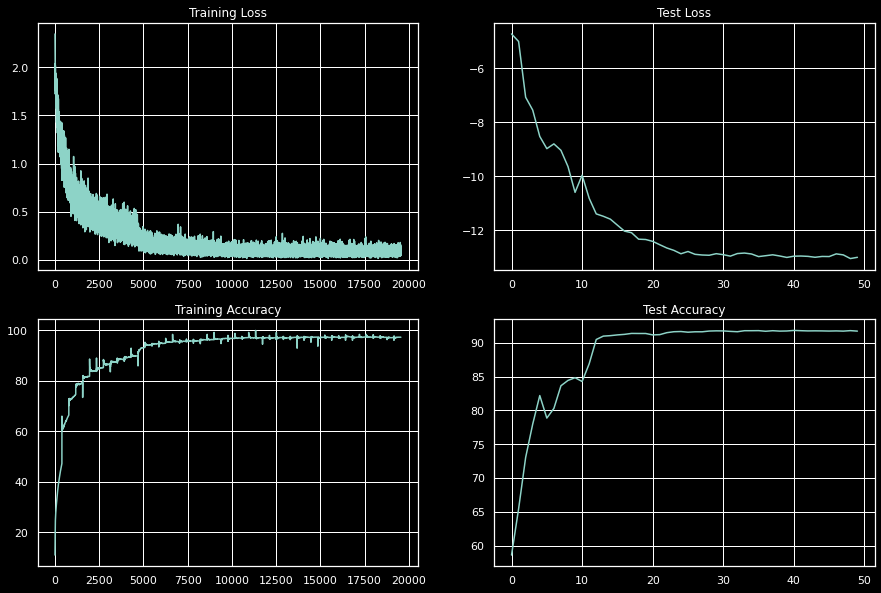

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.style.use("dark_background")

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")
plt.show()

In [32]:

torch.save(model,'./data/cifar')


In [33]:
#load the model
model = torch.load('./data/cifar')
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

In [34]:
#GET PERCENTAGE ACCURACY FOR EACH CLASS      
perClassResult.get_percent_acc_each_class(model,device,classes,testloader)

Accuracy of plane : 96 %
Accuracy of   car : 97 %
Accuracy of  bird : 91 %
Accuracy of   cat : 81 %
Accuracy of  deer : 93 %
Accuracy of   dog : 78 %
Accuracy of  frog : 93 %
Accuracy of horse : 93 %
Accuracy of  ship : 94 %
Accuracy of truck : 96 %


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

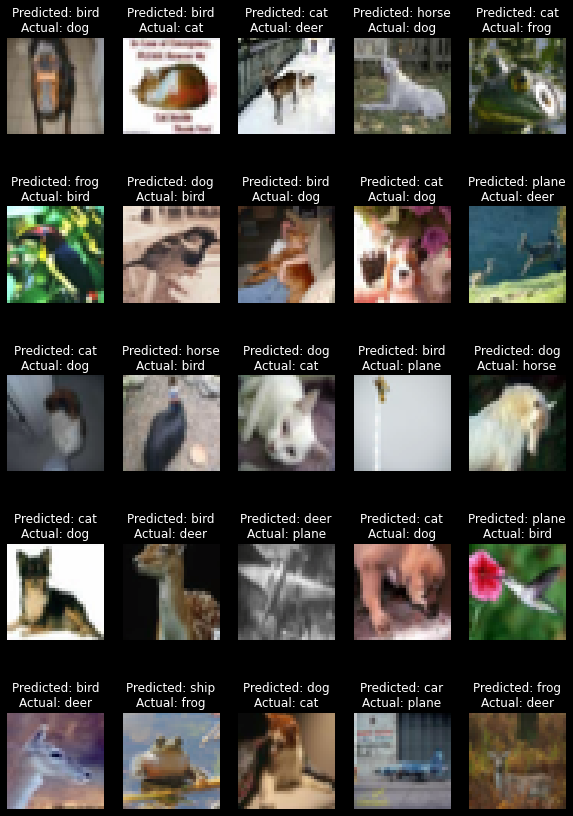

In [35]:
#Plot misclassified Image
plot_misclassified_image.plot_misclassified(25, testloader, device,model,classes,mean,std,format='raw')

In [36]:
len(train_acc),len(train_losses)

(19550, 19550)